In [46]:
import pandas as pd
import os

In [2]:
from Bio.PDB import PDBParser
from Bio.PDB import parse_pdb_header
# import xpdb  # this is the module described below

In [3]:
from Bio import SeqIO

In [4]:
import nglview

ModuleNotFoundError: No module named 'nglview'

In [5]:
train_csv = pd.read_csv('Task/train.csv')

In [6]:
test_csv = pd.read_csv('Task/test.csv')

In [7]:
train_csv.columns

Index(['Unnamed: 0', 'Smiles', 'Active'], dtype='object')

In [8]:
# looking at the content of csv train file
train_csv[train_csv['Active'] == True]

,Unnamed: 0,Smiles,Active
17,17,Nc1ccc(O)c2ncccc12,True
38,38,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,True
52,52,Cl.NCCc1cc(O)c(O)cc1O,True
111,111,Cc1ccc(-n2sc(=O)n(Cc3ccc(F)cc3)c2=O)cc1,True
122,122,Oc1cc2c(cc1C(c1ccc(C(F)(F)F)cc1)N1CCOCC1)OCO2,True
139,139,CN1CCC(CNc2ccc3ncc(-c4cccc(OC(F)(F)F)c4)n3n2)CC1,True
166,166,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,True
167,167,O=C(NCC(=O)N1CCCC1)Nc1ccc2cnccc2c1,True
174,174,CC[C@@H](C)Nc1cc(C(=O)NC2CC3CCC(C2)N3c2ccc(C(=...,True
179,179,C[N+]1(C)[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)...,True


In [9]:
# loading the head of PDB file as a dictionary
# helpful to take a look at the description
with open('Task/target.pdb', 'r') as pdb_file:
    header_dict = parse_pdb_header(pdb_file)

In [10]:
# PDB header
header_dict

{'name': 'crystal structure of sars-cov-2 nsp3 macrodomain (c2 crystal form, 100 k)',
 'head': 'viral protein',
 'idcode': '7KR0',
 'deposition_date': '2020-11-18',
 'release_date': '2020-12-09',
 'structure_method': 'x-ray diffraction',
 'resolution': 0.77,
 'structure_reference': [],
 'journal_reference': "m.schuller,g.j.correy,s.gahbauer,d.fearon,t.wu,r.e.dii.d.young,l.carvalho martins,d.h.smith,u.schulze-gahmt.w.owens,i.deshpande,g.e.merz,a.c.thwin,j.t.biel, j.k.peters,m.moritz,n.herrera,h.t.kratochvil,a.aimon,j.m.bennett,j.brandao neto,a.e.cohen,a.dias,a.douangal.dunnett,o.fedorov,m.p.ferla,m.r.fuchs,t.j.gorrie-stj.m.holton,m.g.johnson,t.krojer,g.meigs,a.j.powell, j.g.m.rack,v.l.rangel,s.russi,r.e.skyner,c.a.smith, a.s.soares,j.l.wierman,k.zhu,p.o'brien,n.jura,a.ashwoj.j.irwin,m.c.thompson,j.e.gestwicki,f.von delft, b.k.shoichet,j.s.fraser,i.ahel fragment binding to the nsp3 macrodomain of sars-cov-identified through crystallographic screening and computational docking. sci adv v.

In [11]:
parser = PDBParser()
structure = parser.get_structure("target", "Task/target.pdb")

In [12]:
structure.header["resolution"]

0.77

In [13]:
structure.header["keywords"]

'macrodomain, adp-ribose, sars-cov-2, viral protein'

In [14]:
print(structure.get_list())
print(structure[0].get_list())

[<Model id=0>]
[<Chain id=A>]


In [15]:
print(structure[0]['A'][2])
print(structure[0]['A'][170])

<Residue GLU het=  resseq=2 icode= >
<Residue GLU het=  resseq=170 icode= >


In [16]:
structure[0]['A'].get_list()

[<Residue GLU het=  resseq=2 icode= >,
 <Residue VAL het=  resseq=3 icode= >,
 <Residue ASN het=  resseq=4 icode= >,
 <Residue SER het=  resseq=5 icode= >,
 <Residue PHE het=  resseq=6 icode= >,
 <Residue SER het=  resseq=7 icode= >,
 <Residue GLY het=  resseq=8 icode= >,
 <Residue TYR het=  resseq=9 icode= >,
 <Residue LEU het=  resseq=10 icode= >,
 <Residue LYS het=  resseq=11 icode= >,
 <Residue LEU het=  resseq=12 icode= >,
 <Residue THR het=  resseq=13 icode= >,
 <Residue ASP het=  resseq=14 icode= >,
 <Residue ASN het=  resseq=15 icode= >,
 <Residue VAL het=  resseq=16 icode= >,
 <Residue TYR het=  resseq=17 icode= >,
 <Residue ILE het=  resseq=18 icode= >,
 <Residue LYS het=  resseq=19 icode= >,
 <Residue ASN het=  resseq=20 icode= >,
 <Residue ALA het=  resseq=21 icode= >,
 <Residue ASP het=  resseq=22 icode= >,
 <Residue ILE het=  resseq=23 icode= >,
 <Residue VAL het=  resseq=24 icode= >,
 <Residue GLU het=  resseq=25 icode= >,
 <Residue GLU het=  resseq=26 icode= >,
 <Residu

### Extracting aminoacid residues

In [17]:
# getting a model from the structure
model = structure[0]
# getting a chain from the model
chain = model["A"]
# obtaining a first residue from the chain
residue_first = chain[2]

In [18]:
print("First residue name: {}".format(residue_first))
# getting a list of atoms in the residue
residue_first.get_list()

First residue name: <Residue GLU het=  resseq=2 icode= >


[<Disordered Atom N>,
 <Disordered Atom CA>,
 <Disordered Atom C>,
 <Disordered Atom O>,
 <Disordered Atom CB>,
 <Disordered Atom CG>,
 <Disordered Atom CD>,
 <Disordered Atom OE1>,
 <Disordered Atom OE2>,
 <Disordered Atom HA>,
 <Disordered Atom HB2>,
 <Disordered Atom HB3>,
 <Disordered Atom HG2>,
 <Disordered Atom HG3>]

In [19]:
# obtaining the last residue from the chain
residue_last = chain[170]
print("First residue name: {}".format(residue_last))
# getting a list of atoms in the residue
residue_last.get_list()

First residue name: <Residue GLU het=  resseq=170 icode= >


[<Disordered Atom N>,
 <Disordered Atom CA>,
 <Disordered Atom C>,
 <Disordered Atom O>,
 <Disordered Atom CB>,
 <Disordered Atom CG>,
 <Disordered Atom CD>,
 <Disordered Atom OE1>,
 <Disordered Atom OE2>,
 <Disordered Atom OXT>,
 <Disordered Atom H>,
 <Disordered Atom HA>,
 <Disordered Atom HB2>,
 <Disordered Atom HB3>,
 <Disordered Atom HG2>,
 <Disordered Atom HG3>]

In [20]:
# demonstrate the structure of the protein visually
# though it is not working in my notebook for some reason
view_target = nglview.show_file("Task/target.pdb")
view_target.render_image()
view_target._display_image()

NameError: name 'nglview' is not defined

## Generating matrices of features from SMILES strings

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [22]:
PandasTools.AddMoleculeColumnToFrame(train_csv, 'Smiles', 'Molecule')

,Smiles,Molecule
0,COc1ccc2[nH]cc(CCN)c2c1,

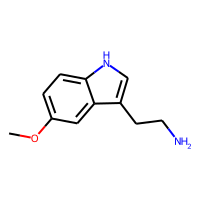

In [23]:
train_csv[['Smiles', 'Molecule']].head(1)

In [24]:
from molvecgen.vectorizers import SmilesVectorizer

In [25]:
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)

In [26]:
smivec

In [27]:
len(train_csv.Molecule.values)

5557

In [28]:
smivec.fit(train_csv.Molecule.values, )

In [29]:
y = train_csv.Active.values.reshape((-1,1))
X = train_csv.Molecule.values
# X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.05, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [30]:
# wrapping a SMILES vectorizer in a dataset
class SMILESMolDataset(Dataset):
    def __init__(self, molecules, y, vectorizer):
        self.molecules = molecules
        self.y = y
        self.vectorizer = vectorizer
    def __len__(self):
        return len(self.molecules)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
             
        mols = self.molecules[idx]
         
        #The vectorizer was written to work with batches, 
        #but PyTorch datasets unfortunately works with single samples
        sample = self.vectorizer.transform([mols])[0]
        label = self.y[idx]
        return sample, label

In [31]:
train_dataset = SMILESMolDataset(X_train, y_train, smivec)

In [32]:
train_dataset[0]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int8),
 array([-0.19207162]))

## Allocating validation sets to GPU

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
X_validation_t = smivec.transform(X_validation, canonical=False)
X_validation_t = torch.tensor(X_validation_t, device=device).float()
y_validation_t = torch.tensor(y_validation, device=device).float()
X_validation_t.shape

cuda:0


torch.Size([251, 599, 48])

## Defining molecular LSTM class

In [34]:
class Net(nn.Module):
    def __init__(self, dimensions, lstm_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
         
        length = dims[0]
        number_tokens = dims[1]
         
     
        self.lstm = nn.LSTM(input_size=number_tokens, hidden_size=lstm_size, num_layers=1, batch_first=True, bidirectional=False)
        self.fc1 = nn.Linear(lstm_size, hidden_size) # Output layer
        self.activation = nn.ReLU() # Non-Linear ReLU Layer       
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        self.dropout = nn.Dropout(dropout_rate)
     
    def forward(self, x):# Forward pass: stacking each layer together
        out, (h_n, c_n) = self.lstm(x) #LSTM network reads in one-hot-encoded SMILES, h_n is last output, out is for all timesteps
        out = self.dropout(h_n) #Dropout
        out = self.fc1(out) # Pass into the hidden layer
        out = self.activation(out) # Use ReLU on hidden activation
        out = self.dropout(out) # dropout
        out = self.fc_out(out) # Use a linear layer for the output
        return out

In [36]:
epochs = 750
dims = smivec.dims
lstm_size = 128  # The size of the LSTM layer
hidden_size = 128  # The size of the hidden non-linear layer
dropout_rate = 0.50 # The dropout rate
output_size = 1        # This is just a single task, so this will be one
batch_size = 128   # The mini_batch size during training
learning_rate = 0.003  # The initial learning rate for the optimizer

	
model = Net(smivec, lstm_size, hidden_size, dropout_rate, output_size)
model.cuda()

Net(
  (lstm): LSTM(48, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (activation): ReLU()
  (fc_out): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [37]:
pred = model.forward(X_validation_t[10:11])
pred

tensor([[[0.0365]]], device='cuda:0', grad_fn=<AddBackward0>)

In [40]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5,
                                patience=50, verbose=True, threshold=0.0001,
                                threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-08)

In [42]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers=4)

In [43]:
for smiles, labels in train_loader:
    break

In [47]:
model.train() #Ensure the network is in "train" mode with dropouts active
train_losses = []
validation_losses = []
for e in range(epochs):
    running_loss = 0
    for smiles, labels in train_loader:
        # Push numpy to CUDA tensors 
        smiles = torch.tensor(smiles, device=device).float()
        labels = torch.tensor(labels, device=device).float()
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pass
         
        output = model(smiles) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step() # Optimize the weights
         
        running_loss += loss.item()
    else:
         
         
        model.eval()
        validation_loss = torch.mean(( y_validation_t - model(X_validation_t) )**2).item()
        model.train()
         
        lr_scheduler.step(validation_loss)
         
        train_loss = running_loss/len(train_loader)
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)
        if (e+1) % 10 == 0:
            print("Epoch %i, Training loss: %0.2F Validation loss: %0.2F"%(e + 1, train_loss, validation_loss))
            torch.save(model.state_dict(), os.path.join('/scratch/gsergei/checkpoints/challenge_22feb_cov19',
                                                       "cp_%i.pth" % e))

/scratch/gsergei/anaconda3/envs/challenge_22feb_cov19/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/scratch/gsergei/anaconda3/envs/challenge_22feb_cov19/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


Epoch 10, Training loss: 0.87 Validation loss: 1.69
Epoch 20, Training loss: 0.85 Validation loss: 1.68
Epoch 30, Training loss: 0.81 Validation loss: 1.70
Epoch 40, Training loss: 0.80 Validation loss: 1.66
Epoch 50, Training loss: 0.85 Validation loss: 1.70
Epoch    92: reducing learning rate of group 0 to 1.5000e-03.
Epoch 60, Training loss: 0.75 Validation loss: 1.68
Epoch 70, Training loss: 0.76 Validation loss: 1.68
Epoch 80, Training loss: 0.74 Validation loss: 1.68
Epoch 90, Training loss: 0.74 Validation loss: 1.69
Epoch 100, Training loss: 0.77 Validation loss: 1.68
Epoch   143: reducing learning rate of group 0 to 7.5000e-04.
Epoch 110, Training loss: 0.74 Validation loss: 1.68
Epoch 120, Training loss: 0.70 Validation loss: 1.72
Epoch 130, Training loss: 0.76 Validation loss: 1.69
Epoch 140, Training loss: 0.75 Validation loss: 1.72
Epoch 150, Training loss: 0.70 Validation loss: 1.72
Epoch   194: reducing learning rate of group 0 to 3.7500e-04.
Epoch 160, Training loss: 0.

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [77]:
X_train_T = smivec.transform(X_train, canonical=False)

In [81]:
torch.cuda.get_device_name()

'Tesla V100-SXM2-32GB'

In [82]:
type(X_train_T)

numpy.ndarray

In [83]:
X_train_T = torch.Tensor(X_train_T).float()

In [84]:
X_train_T.to(device)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [86]:
X_train_T = torch.Tensor(smivec.transform(X_train, canonical=False)).float()
X_train_T = X_train_T.to(device)
X_validation_T = torch.Tensor(smivec.transform(X_validation)).float()
X_validation_T = X_validation_T.to(device)
X_test_T = torch.Tensor(smivec.transform(X_test)).float()
X_test_T = X_test_T.to(device)

model.eval() #Swith to evaluation mode, where dropout is switched off
y_pred_train = model(X_train_T)
y_pred_validation = model(X_validation_T)
y_pred_test = model(X_test_T)

In [89]:
torch.mean(( torch.Tensor(y_train) - y_pred_train.to('cpu'))**2).item()

0.674541711807251

In [90]:
torch.mean(( torch.Tensor(y_validation) - y_pred_validation.to('cpu') )**2).item()

1.7040613889694214

In [91]:
torch.mean(( torch.Tensor(y_test) - y_pred_test.to('cpu') )**2).item()

1.198073387145996

In [94]:
type(y_test)
type(y_train)

numpy.ndarray

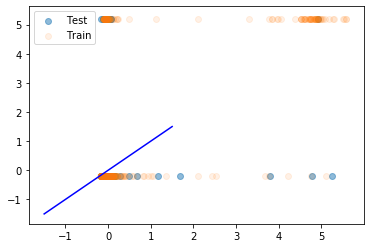

In [95]:
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()

plt.scatter(flatten(y_pred_test), y_test.flatten(), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), y_train.flatten(), alpha=0.1, label="Train")
plt.legend()
plt.plot([-1.5, 1.5], [-1.5,1.5], c="b")